In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline

# Set figure aesthetics
sns.set_style("whitegrid") #, {'ytick.major.size': 10.0})
#sns.set_context("talk")

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [11]:
train_users = pd.read_csv('input/train_users_2.csv')

In [3]:
session_df = pd.read_csv('input/sessions.csv')

In [4]:
#### Counts of Actions Taken

In [5]:
session_users = session_df

# Clean missing values
session_users['secs_elapsed'].fillna(0,inplace=True)
session_users['action_type'].fillna('',inplace=True)

# Combine for grouping
#session_users['action_action_type'] = session_users['action']+'__'+session_users['action_type']
session_users['action_action_detail'] = session_users['action']+'__'+session_users['action_detail']
#session_users['action_action_type_detail'] = session_users['action']+'__'+session_users['action_type']+'__'+session_users['action_detail']


# Group actions for users
#session_users1 = session_users.groupby(['user_id','action_action_type']).count()['secs_elapsed'].unstack().fillna(0)
session_users2 = session_users.groupby(['user_id','action_action_detail']).count()['secs_elapsed'].unstack().fillna(0)
#session_users3 = session_users.groupby(['user_id','action_action_type_detail']).count()['secs_elapsed'].unstack().fillna(0)


In [6]:
#session_users2.head(2)

In [7]:
#### Elapsed Time by Device Type

In [8]:
deviceusage_df = session_df[['user_id','device_type','secs_elapsed']].groupby(['user_id','device_type']).sum().unstack()['secs_elapsed']
deviceusage_df.fillna(0,inplace=True)
#deviceusage_df.head(2)

In [9]:
SessionFeatures = pd.merge(session_users2,deviceusage_df,right_index=True,left_index=True,how='inner')

In [70]:
X = pd.merge(train_users[['id','country_destination']],SessionFeatures,right_index=True,left_on='id',how='inner')
y = X['country_destination']
X.drop(['id','country_destination'],axis=1,inplace=True)
X.head(3)


,10__message_post,11__message_post,12__message_post,15__message_post,about_us__-unknown-,accept_decline__host_respond_page,account__-unknown-,acculynk_bin_check_failed__-unknown-,acculynk_bin_check_success__-unknown-,acculynk_load_pin_pad__-unknown-,...,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch
137021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3315820,0,0,0,0
137022,0,0,0,0,0,0,0,0,0,0,...,0,0,207842,0,0,0,0,0,0,0
137023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1059362,0,0,0,0


In [73]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=150)
X_new = selector.fit_transform(X,y)

FeaturePvalues = pd.Series(index=X.columns,data=selector.pvalues_).sort_values(ascending=True)
FeatureScores = pd.Series(index=X.columns,data=selector.scores_).sort_values(ascending=False)



c:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [  5   7  10  12  15  16  63  65  80  82  83  84  85  89  90  92 114 124
 127 131 135 136 141 154 171 179 188 196 197 198 199 200 201 203 239 258
 259 319 324 332 334 335 339 343 348 349 360 362 378 383 386 390 393 411
 427] are constant.
  UserWarning)


In [88]:
X_new = X[X.columns[selector.get_support()]]

In [90]:
y.shape

(73403,)

In [76]:
a = FeaturePvalues[FeaturePvalues<0.01]
print(len(a))
a

175


requested__post_checkout_action                             0.000000e+00
confirm_email__confirm_email_link                           0.000000e+00
create__create_phone_numbers                                0.000000e+00
requested__p5                                               0.000000e+00
pending__pending                                            0.000000e+00
verify__-unknown-                                           0.000000e+00
identity__-unknown-                                         0.000000e+00
at_checkpoint__at_checkpoint                                0.000000e+00
travel_plans_current__your_trips                            0.000000e+00
dashboard__dashboard                                       1.914374e-302
cancellation_policies__cancellation_policies               1.005414e-266
Mac Desktop                                                4.919564e-263
kba_update__-unknown-                                      7.929137e-215
ajax_refresh_subtotal__change_trip_characteristics 

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


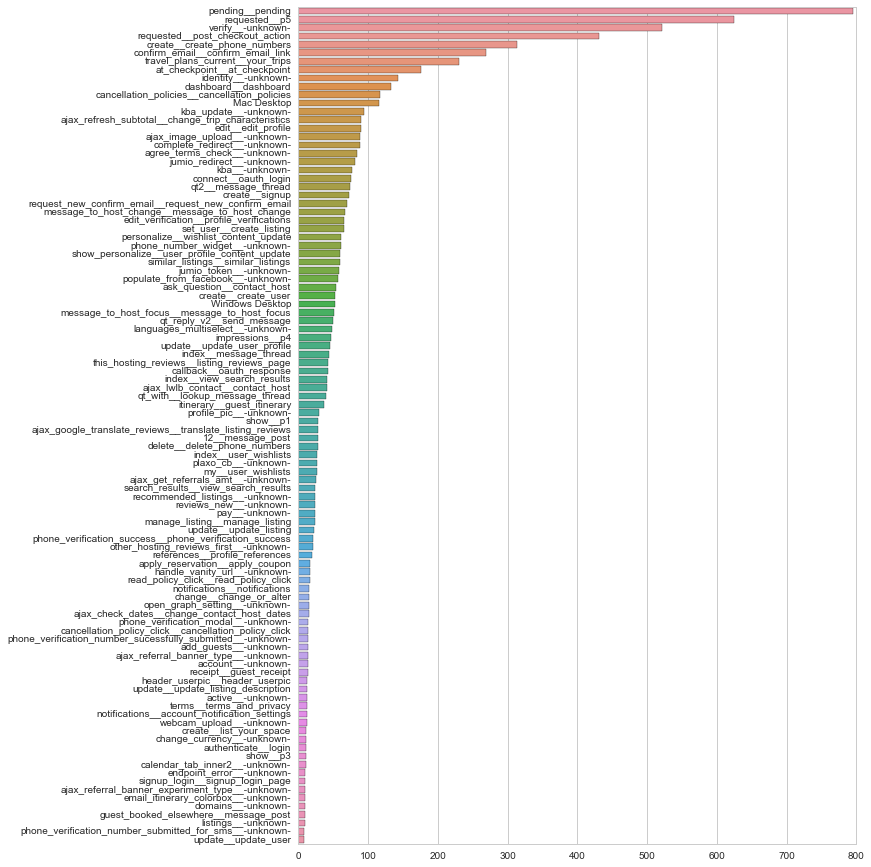

In [93]:
k = 100
plt.figure(figsize=(10,15))
sns.barplot(y=FeatureScores.index[0:k],x=FeatureScores.head(k))
#plt.xticks(rotation = 90)

In [102]:
X['connect__oauth_login'].describe()

count    73403.000000
mean         0.074220
std          0.369575
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: connect__oauth_login, dtype: float64